In [79]:
import os
import requests # pip install requests
import numpy as np
import pandas as pd
from IPython.display import YouTubeVideo


ROOT_DIR = os.path.dirname(os.path.realpath('__file__'))
DATA_PATH = os.path.join(ROOT_DIR, '..', 'data')

script_path = os.path.join(DATA_PATH, 'cleaned_subset.csv')


df = pd.read_csv(script_path)

print ('Total: {0} images'.format(df.shape[0]))




Total: 10682 images


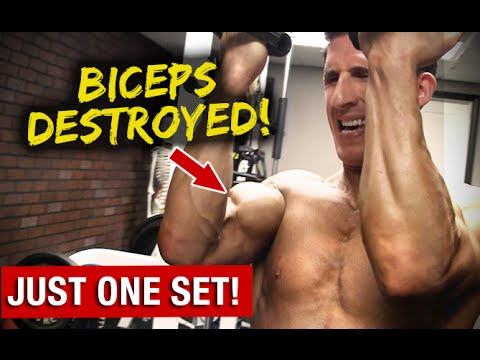

In [80]:
YouTubeVideo('54krdTEyziQ')

In [81]:
df = df[:4000]
df.shape[0]
df['ImageText'] = ''
df['ContainsText'] = ''

In [87]:
########### Python 2.7 #############
import httplib, urllib, base64, json, re, time

###############################################
#### Update or verify the following values. ###
###############################################

# Replace the subscription_key string value with your valid subscription key.
subscription_key = '99111d8302ee4f60a5d8b114abdf531f'

# Replace or verify the region.
#
# You must use the same region in your REST API call as you used to obtain your subscription keys.
# For example, if you obtained your subscription keys from the westus region, replace
# "westcentralus" in the URI below with "westus".
#
# NOTE: Free trial subscription keys are generated in the westcentralus region, so if you are using
# a free trial subscription key, you should not need to change this region.
uri_base = 'westcentralus.api.cognitive.microsoft.com'

headers = {
    # Request headers.
    'Content-Type': 'application/json',
    'Ocp-Apim-Subscription-Key': subscription_key,
}

params = urllib.urlencode({
    # Request parameters. The language setting "unk" means automatically detect the language.
    'language': 'unk',
    'detectOrientation ': 'true',
})


for index, row in df.iterrows():
    link = re.findall(r"'(.*?)'",df['Thumbnail Default'][index])[0]  
    # The URL of a JPEG image containing text.
    body = "{'url':" + "'" + link + "'" + "}"
    print body
    try:
        # Execute the REST API call and get the response.
        conn = httplib.HTTPSConnection('westcentralus.api.cognitive.microsoft.com')
        conn.request("POST", "/vision/v1.0/ocr?%s" % params, body, headers)
        response = conn.getresponse()
        data = response.read()

        # 'data' contains the JSON data. The following formats the JSON data for display.
        parsed = json.loads(data)
        print ("Response:", index)
        #print (json.dumps(parsed, sort_keys=True, indent=2))

        df['ImageText'][index] = parsed 
        df['ContainsText'][index] = str(parsed['orientation'] != 'NotDetected')
        
    except Exception as e:
        
        
        print("Sleeping for 60 seconds")
        print("Index Number",index)
        time.sleep(61)          
        
        # Execute the REST API call and get the response.
        conn = httplib.HTTPSConnection('westcentralus.api.cognitive.microsoft.com')
        conn.request("POST", "/vision/v1.0/ocr?%s" % params, body, headers)
        response = conn.getresponse()
        data = response.read()

        # 'data' contains the JSON data. The following formats the JSON data for display.
        parsed = json.loads(data)
        print ("Response:", index)
        #print (json.dumps(parsed, sort_keys=True, indent=2))

        df['ImageText'][index] = parsed 
        df['ContainsText'][index] = str(parsed['orientation'] != 'NotDetected')
        
conn.close()

{'url':'https://i.ytimg.com/vi/AUzyaHo0QQc/default.jpg'}
('Response:', 0)
{'url':'https://i.ytimg.com/vi/1Zgtdb7jp60/default.jpg'}


C:\Users\kevjy\Anaconda\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\kevjy\Anaconda\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


('Response:', 1)
{'url':'https://i.ytimg.com/vi/1Sfii7rnkJQ/default.jpg'}
('Response:', 2)
{'url':'https://i.ytimg.com/vi/UUwSKJjx9Go/default.jpg'}
('Response:', 3)
{'url':'https://i.ytimg.com/vi/Yl3NGvna2KA/default.jpg'}
('Response:', 4)
{'url':'https://i.ytimg.com/vi/EBVTMSKY-Cw/default.jpg'}
('Response:', 5)
{'url':'https://i.ytimg.com/vi/y04s-zEl5GM/default.jpg'}
('Response:', 6)
{'url':'https://i.ytimg.com/vi/Ff84gG3bgVI/default.jpg'}
('Response:', 7)
{'url':'https://i.ytimg.com/vi/jLS7S-nRS70/default.jpg'}
('Response:', 8)
{'url':'https://i.ytimg.com/vi/yOgRXblTEjI/default.jpg'}
('Response:', 9)
{'url':'https://i.ytimg.com/vi/WI-2scOeXU0/default.jpg'}
('Response:', 10)
{'url':'https://i.ytimg.com/vi/QdmYTYAqHG4/default.jpg'}
('Response:', 11)
{'url':'https://i.ytimg.com/vi/QyKYEKrYraI/default.jpg'}
('Response:', 12)
{'url':'https://i.ytimg.com/vi/VnNH6OMqT9E/default.jpg'}
('Response:', 13)
{'url':'https://i.ytimg.com/vi/U_I9LcWNrBg/default.jpg'}
('Response:', 14)
{'url':'https://

C:\Users\kevjy\Anaconda\lib\site-packages\ipykernel_launcher.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\kevjy\Anaconda\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


('Response:', 21)
{'url':'https://i.ytimg.com/vi/FnYYqmoRI9k/default.jpg'}
('Response:', 22)
{'url':'https://i.ytimg.com/vi/6ZXv4V_JR8g/default.jpg'}
('Response:', 23)
{'url':'https://i.ytimg.com/vi/i0RCIjZ7nHo/default.jpg'}
('Response:', 24)
{'url':'https://i.ytimg.com/vi/i_DCpA-0haE/default.jpg'}
('Response:', 25)
{'url':'https://i.ytimg.com/vi/73isTrLxrX4/default.jpg'}
('Response:', 26)
{'url':'https://i.ytimg.com/vi/WNvxFjzSs58/default.jpg'}
('Response:', 27)
{'url':'https://i.ytimg.com/vi/L4S7sYup_Rw/default.jpg'}
('Response:', 28)
{'url':'https://i.ytimg.com/vi/ctfe4HwAb48/default.jpg'}
('Response:', 29)
{'url':'https://i.ytimg.com/vi/b2wy7po5weA/default.jpg'}
('Response:', 30)
{'url':'https://i.ytimg.com/vi/ThnZ0n-7x4E/default.jpg'}
('Response:', 31)
{'url':'https://i.ytimg.com/vi/aX-YuvQkSRE/default.jpg'}
('Response:', 32)
{'url':'https://i.ytimg.com/vi/BmraSo9GZEc/default.jpg'}
('Response:', 33)
{'url':'https://i.ytimg.com/vi/EquFzTGMUgY/default.jpg'}
('Response:', 34)
{'url':

('Response:', 126)
{'url':'https://i.ytimg.com/vi/XWO7hxF9neQ/default.jpg'}
('Response:', 127)
{'url':'https://i.ytimg.com/vi/Wdp_dsbgwrM/default.jpg'}
('Response:', 128)
{'url':'https://i.ytimg.com/vi/OSckGzMkuB4/default.jpg'}
('Response:', 129)
{'url':'https://i.ytimg.com/vi/sVylMFWSIYw/default.jpg'}
('Response:', 130)
{'url':'https://i.ytimg.com/vi/4vcB2kJazaA/default.jpg'}
('Response:', 131)
{'url':'https://i.ytimg.com/vi/RjKkuSvFuOk/default.jpg'}
('Response:', 132)
{'url':'https://i.ytimg.com/vi/PYJgukiEXyQ/default.jpg'}
('Response:', 133)
{'url':'https://i.ytimg.com/vi/jF5z4j3MtDk/default.jpg'}
('Response:', 134)
{'url':'https://i.ytimg.com/vi/w9mr3DPM7xU/default.jpg'}
('Response:', 135)
{'url':'https://i.ytimg.com/vi/J9nGjRZBqTo/default.jpg'}
('Response:', 136)
{'url':'https://i.ytimg.com/vi/1mKR5Cmr3pE/default.jpg'}
('Response:', 137)
{'url':'https://i.ytimg.com/vi/y7RlGss3Ars/default.jpg'}
('Response:', 138)
{'url':'https://i.ytimg.com/vi/TezSv6woBVU/default.jpg'}
('Response:'

('Response:', 230)
{'url':'https://i.ytimg.com/vi/OOGJ1CWU8qQ/default.jpg'}
('Response:', 231)
{'url':'https://i.ytimg.com/vi/-4ohaaxds2M/default.jpg'}
('Response:', 232)
{'url':'https://i.ytimg.com/vi/H-WRUhJBUao/default.jpg'}
('Response:', 233)
{'url':'https://i.ytimg.com/vi/R5iLUJm2l3k/default.jpg'}
('Response:', 234)
{'url':'https://i.ytimg.com/vi/WKEFIiDGM7o/default.jpg'}
('Response:', 235)
{'url':'https://i.ytimg.com/vi/1obYWF6jSoc/default.jpg'}
('Response:', 236)
{'url':'https://i.ytimg.com/vi/dK_xKvsVI0E/default.jpg'}
('Response:', 237)
{'url':'https://i.ytimg.com/vi/gmxSxwjAWVE/default.jpg'}
('Response:', 238)
{'url':'https://i.ytimg.com/vi/WVtZhSOGshc/default.jpg'}
('Response:', 239)
{'url':'https://i.ytimg.com/vi/y-6vq0hDFbc/default.jpg'}
('Response:', 240)
Sleeping for 60 seconds
('Index Number', 240)
('Response:', 240)
{'url':'https://i.ytimg.com/vi/0fVWo5ruXUc/default.jpg'}
('Response:', 241)
{'url':'https://i.ytimg.com/vi/W0wNSoJ3S3s/default.jpg'}
('Response:', 242)
{'ur

('Response:', 334)
{'url':'https://i.ytimg.com/vi/Akp71PGEsoY/default.jpg'}
('Response:', 335)
{'url':'https://i.ytimg.com/vi/UZrqofca8xw/default.jpg'}
('Response:', 336)
{'url':'https://i.ytimg.com/vi/Im-j0T488P8/default.jpg'}
('Response:', 337)
{'url':'https://i.ytimg.com/vi/xiDk6GqdrYU/default.jpg'}
('Response:', 338)
{'url':'https://i.ytimg.com/vi/AI_o0yWC_ow/default.jpg'}
('Response:', 339)
{'url':'https://i.ytimg.com/vi/6WJ0-6dRn_c/default.jpg'}
('Response:', 340)
Sleeping for 60 seconds
('Index Number', 340)
('Response:', 340)
{'url':'https://i.ytimg.com/vi/H3YpZ-Jez-0/default.jpg'}
('Response:', 341)
{'url':'https://i.ytimg.com/vi/10n9GqT3itY/default.jpg'}
('Response:', 342)
{'url':'https://i.ytimg.com/vi/0E7NvAl2BUg/default.jpg'}
('Response:', 343)
{'url':'https://i.ytimg.com/vi/_ieSbXFh6d4/default.jpg'}
('Response:', 344)
{'url':'https://i.ytimg.com/vi/tYMK7OwaCG8/default.jpg'}
('Response:', 345)
{'url':'https://i.ytimg.com/vi/2S63wRnWxgE/default.jpg'}
('Response:', 346)
{'ur

('Response:', 438)
{'url':'https://i.ytimg.com/vi/7GzOim7jHF4/default.jpg'}
('Response:', 439)
{'url':'https://i.ytimg.com/vi/KJYXs-pWGn4/default.jpg'}
('Response:', 440)
Sleeping for 60 seconds
('Index Number', 440)
('Response:', 440)
{'url':'https://i.ytimg.com/vi/WQ-hjNf-3_c/default.jpg'}
('Response:', 441)
{'url':'https://i.ytimg.com/vi/Rw48pWMs76o/default.jpg'}
('Response:', 442)
{'url':'https://i.ytimg.com/vi/5BFtyoAU9Uc/default.jpg'}
('Response:', 443)
{'url':'https://i.ytimg.com/vi/40LRbKzpx8E/default.jpg'}
('Response:', 444)
{'url':'https://i.ytimg.com/vi/r2PPulgIJIg/default.jpg'}
('Response:', 445)
{'url':'https://i.ytimg.com/vi/8p6nBNVbFus/default.jpg'}
('Response:', 446)
{'url':'https://i.ytimg.com/vi/bxV8IMVAzzw/default.jpg'}
('Response:', 447)
{'url':'https://i.ytimg.com/vi/3h6lab4GusU/default.jpg'}
('Response:', 448)
{'url':'https://i.ytimg.com/vi/MYyOrOtcOz4/default.jpg'}
('Response:', 449)
{'url':'https://i.ytimg.com/vi/_qKEzUb70RQ/default.jpg'}
('Response:', 450)
{'ur

('Response:', 541)
{'url':'https://i.ytimg.com/vi/bCboX1rc4mU/default.jpg'}
('Response:', 542)
{'url':'https://i.ytimg.com/vi/XieO76cuMr0/default.jpg'}
('Response:', 543)
{'url':'https://i.ytimg.com/vi/z3sm6YgpJho/default.jpg'}
('Response:', 544)
{'url':'https://i.ytimg.com/vi/wRlMI8Pd-CM/default.jpg'}
('Response:', 545)
{'url':'https://i.ytimg.com/vi/-LnLTf1GU8Q/default.jpg'}
('Response:', 546)
{'url':'https://i.ytimg.com/vi/56Y4fS-aNpk/default.jpg'}
('Response:', 547)
{'url':'https://i.ytimg.com/vi/Nfw7gAtMIeI/default.jpg'}
('Response:', 548)
{'url':'https://i.ytimg.com/vi/8m2clTjlobI/default.jpg'}
('Response:', 549)
{'url':'https://i.ytimg.com/vi/5OBoQPMkHjs/default.jpg'}
('Response:', 550)
{'url':'https://i.ytimg.com/vi/1xcgm30Ypnk/default.jpg'}
('Response:', 551)
{'url':'https://i.ytimg.com/vi/EmtfrfgPKXc/default.jpg'}
('Response:', 552)
{'url':'https://i.ytimg.com/vi/Fxcx4JWjLQU/default.jpg'}
('Response:', 553)
{'url':'https://i.ytimg.com/vi/f-Hf83dymX0/default.jpg'}
('Response:'

('Response:', 645)
{'url':'https://i.ytimg.com/vi/RMiUGntxiD4/default.jpg'}
('Response:', 646)
{'url':'https://i.ytimg.com/vi/blbOjbT60Ws/default.jpg'}
('Response:', 647)
{'url':'https://i.ytimg.com/vi/NHO6Up7qFGQ/default.jpg'}
('Response:', 648)
{'url':'https://i.ytimg.com/vi/-FjSCPR2SjY/default.jpg'}
('Response:', 649)
{'url':'https://i.ytimg.com/vi/5EZ8HuZg6bY/default.jpg'}
('Response:', 650)
{'url':'https://i.ytimg.com/vi/-CYXRCzRcJc/default.jpg'}
('Response:', 651)
{'url':'https://i.ytimg.com/vi/bOuqBvspr-o/default.jpg'}
('Response:', 652)
{'url':'https://i.ytimg.com/vi/ovDsE7NPwkI/default.jpg'}
('Response:', 653)
{'url':'https://i.ytimg.com/vi/vDA-dneQBN8/default.jpg'}
('Response:', 654)
{'url':'https://i.ytimg.com/vi/uunjlBMDkyg/default.jpg'}
('Response:', 655)
{'url':'https://i.ytimg.com/vi/J87y0RLNb8M/default.jpg'}
('Response:', 656)
{'url':'https://i.ytimg.com/vi/KlaVxC6b47U/default.jpg'}
('Response:', 657)
{'url':'https://i.ytimg.com/vi/40xUDTvErQ0/default.jpg'}
('Response:'

('Response:', 749)
{'url':'https://i.ytimg.com/vi/faiVeKQyQUU/default.jpg'}
('Response:', 750)
{'url':'https://i.ytimg.com/vi/snlvqfMUGx4/default.jpg'}
('Response:', 751)
{'url':'https://i.ytimg.com/vi/NGZPODYb6dE/default.jpg'}
('Response:', 752)
{'url':'https://i.ytimg.com/vi/s7CKXFZHb2s/default.jpg'}
('Response:', 753)
{'url':'https://i.ytimg.com/vi/EPKUVIO1nlw/default.jpg'}
('Response:', 754)
{'url':'https://i.ytimg.com/vi/8VHON3qPedk/default.jpg'}
('Response:', 755)
{'url':'https://i.ytimg.com/vi/8BdfsPLwc6Y/default.jpg'}
('Response:', 756)
{'url':'https://i.ytimg.com/vi/jb18Up14m7M/default.jpg'}
('Response:', 757)
{'url':'https://i.ytimg.com/vi/dn8TOat-3Cg/default.jpg'}
('Response:', 758)
{'url':'https://i.ytimg.com/vi/ENYdoW1mfDM/default.jpg'}
('Response:', 759)
{'url':'https://i.ytimg.com/vi/JHILJwIKm2w/default.jpg'}
('Response:', 760)
Sleeping for 60 seconds
('Index Number', 760)
('Response:', 760)
{'url':'https://i.ytimg.com/vi/A1WPSZ6ur1Y/default.jpg'}
('Response:', 761)
{'ur

('Response:', 853)
{'url':'https://i.ytimg.com/vi/KPpctoqs8Fc/default.jpg'}
('Response:', 854)
{'url':'https://i.ytimg.com/vi/9FwTaUWWUJ8/default.jpg'}
('Response:', 855)
{'url':'https://i.ytimg.com/vi/p2XRtf8B3IA/default.jpg'}
('Response:', 856)
{'url':'https://i.ytimg.com/vi/5fMhaLafQjk/default.jpg'}
('Response:', 857)
{'url':'https://i.ytimg.com/vi/5WaAf0FCdD0/default.jpg'}
('Response:', 858)
{'url':'https://i.ytimg.com/vi/qzqPPtUbtiA/default.jpg'}
('Response:', 859)
{'url':'https://i.ytimg.com/vi/C-_N8clX0Os/default.jpg'}
('Response:', 860)
Sleeping for 60 seconds
('Index Number', 860)
('Response:', 860)
{'url':'https://i.ytimg.com/vi/-Y0HCbv5v94/default.jpg'}
('Response:', 861)
{'url':'https://i.ytimg.com/vi/fufIe2GaJnA/default.jpg'}
('Response:', 862)
{'url':'https://i.ytimg.com/vi/b96hMaOVz2s/default.jpg'}
('Response:', 863)
{'url':'https://i.ytimg.com/vi/FS9HZLqSvx8/default.jpg'}
('Response:', 864)
{'url':'https://i.ytimg.com/vi/HYO4tbvwaDk/default.jpg'}
('Response:', 865)
{'ur

('Response:', 957)
{'url':'https://i.ytimg.com/vi/VzJEg0uX3c8/default.jpg'}
('Response:', 958)
{'url':'https://i.ytimg.com/vi/EKHCyFhsMAQ/default.jpg'}
('Response:', 959)
{'url':'https://i.ytimg.com/vi/SeuEE7XnJlw/default.jpg'}
('Response:', 960)
Sleeping for 60 seconds
('Index Number', 960)
('Response:', 960)
{'url':'https://i.ytimg.com/vi/XWF0dhGOxdw/default.jpg'}
('Response:', 961)
{'url':'https://i.ytimg.com/vi/Mf_Pv1qPZpQ/default.jpg'}
('Response:', 962)
{'url':'https://i.ytimg.com/vi/HA14WpAXqRg/default.jpg'}
('Response:', 963)
{'url':'https://i.ytimg.com/vi/R4YTHK3DhmI/default.jpg'}
('Response:', 964)
{'url':'https://i.ytimg.com/vi/r3j2zm4pvHE/default.jpg'}
('Response:', 965)
{'url':'https://i.ytimg.com/vi/iuPDmmanUbY/default.jpg'}
('Response:', 966)
{'url':'https://i.ytimg.com/vi/ORPAf3JJjCc/default.jpg'}
('Response:', 967)
{'url':'https://i.ytimg.com/vi/PYBHz-zz-CU/default.jpg'}
('Response:', 968)
{'url':'https://i.ytimg.com/vi/gE6DmnwARrI/default.jpg'}
('Response:', 969)
{'ur

('Response:', 1060)
Sleeping for 60 seconds
('Index Number', 1060)
('Response:', 1060)
{'url':'https://i.ytimg.com/vi/DP3Q-nMgtxY/default.jpg'}
('Response:', 1061)
{'url':'https://i.ytimg.com/vi/SF4_P9bgqZA/default.jpg'}
('Response:', 1062)
{'url':'https://i.ytimg.com/vi/umm1T5_ptaQ/default.jpg'}
('Response:', 1063)
{'url':'https://i.ytimg.com/vi/MKTfcYR3Wok/default.jpg'}
('Response:', 1064)
{'url':'https://i.ytimg.com/vi/aNdWSCcpung/default.jpg'}
('Response:', 1065)
{'url':'https://i.ytimg.com/vi/7Tx_qGl_L74/default.jpg'}
('Response:', 1066)
{'url':'https://i.ytimg.com/vi/RCTxFmr07P4/default.jpg'}
('Response:', 1067)
{'url':'https://i.ytimg.com/vi/QOQjaD4bgQc/default.jpg'}
('Response:', 1068)
{'url':'https://i.ytimg.com/vi/XF1dTWh8F4E/default.jpg'}
('Response:', 1069)
{'url':'https://i.ytimg.com/vi/ZGyk7z5z1X8/default.jpg'}
('Response:', 1070)
{'url':'https://i.ytimg.com/vi/wLTFNHKB2K0/default.jpg'}
('Response:', 1071)
{'url':'https://i.ytimg.com/vi/OInZttmvdio/default.jpg'}
('Respons

('Response:', 1162)
{'url':'https://i.ytimg.com/vi/UIdXwmaIJgY/default.jpg'}
('Response:', 1163)
{'url':'https://i.ytimg.com/vi/K5K6kWJJd2M/default.jpg'}
('Response:', 1164)
{'url':'https://i.ytimg.com/vi/5Bwbum9KumE/default.jpg'}
('Response:', 1165)
{'url':'https://i.ytimg.com/vi/XOSX9zMwZ4k/default.jpg'}
('Response:', 1166)
{'url':'https://i.ytimg.com/vi/5QTV8QCmrbc/default.jpg'}
('Response:', 1167)
{'url':'https://i.ytimg.com/vi/Hc54G-yhRNE/default.jpg'}
('Response:', 1168)
{'url':'https://i.ytimg.com/vi/6AyVI7VvBZQ/default.jpg'}
('Response:', 1169)
{'url':'https://i.ytimg.com/vi/-b-vSdgHnCo/default.jpg'}
('Response:', 1170)
{'url':'https://i.ytimg.com/vi/FT6U9gGZjbA/default.jpg'}
('Response:', 1171)
{'url':'https://i.ytimg.com/vi/R6G8_Mdz5g4/default.jpg'}
('Response:', 1172)
{'url':'https://i.ytimg.com/vi/J-CSSJDjtdA/default.jpg'}
('Response:', 1173)
{'url':'https://i.ytimg.com/vi/6CiTSmkM8bU/default.jpg'}
('Response:', 1174)
{'url':'https://i.ytimg.com/vi/dDhxLVxCHaI/default.jpg'}

('Response:', 1265)
{'url':'https://i.ytimg.com/vi/77fP09mtrDU/default.jpg'}
('Response:', 1266)
{'url':'https://i.ytimg.com/vi/WLKWv8Cq1Uk/default.jpg'}
('Response:', 1267)
{'url':'https://i.ytimg.com/vi/QCHQTgaGyoI/default.jpg'}
('Response:', 1268)
{'url':'https://i.ytimg.com/vi/ed-08DwgwFk/default.jpg'}
('Response:', 1269)
{'url':'https://i.ytimg.com/vi/g6zBv9eVe0g/default.jpg'}
('Response:', 1270)
{'url':'https://i.ytimg.com/vi/i3J1isBbREw/default.jpg'}
('Response:', 1271)
{'url':'https://i.ytimg.com/vi/iBgYxCK2zc8/default.jpg'}
('Response:', 1272)
{'url':'https://i.ytimg.com/vi/pWkbWzNffH0/default.jpg'}
('Response:', 1273)
{'url':'https://i.ytimg.com/vi/sHGbG5XMeKI/default.jpg'}
('Response:', 1274)
{'url':'https://i.ytimg.com/vi/13XRGVudsA4/default.jpg'}
('Response:', 1275)
{'url':'https://i.ytimg.com/vi/jLbT5UJsQjg/default.jpg'}
('Response:', 1276)
{'url':'https://i.ytimg.com/vi/ADZUZO0_AQw/default.jpg'}
('Response:', 1277)
{'url':'https://i.ytimg.com/vi/F3iTLWV4IEY/default.jpg'}

('Response:', 1368)
{'url':'https://i.ytimg.com/vi/W7L2Z39pLK8/default.jpg'}
('Response:', 1369)
{'url':'https://i.ytimg.com/vi/OD9D2y-eE58/default.jpg'}
('Response:', 1370)
{'url':'https://i.ytimg.com/vi/tdznuGYmxKY/default.jpg'}
('Response:', 1371)
{'url':'https://i.ytimg.com/vi/4tMi8Ll3fuE/default.jpg'}
('Response:', 1372)
{'url':'https://i.ytimg.com/vi/Q2pns9ib2-s/default.jpg'}
('Response:', 1373)
{'url':'https://i.ytimg.com/vi/XZ4xfcikvKQ/default.jpg'}
('Response:', 1374)
{'url':'https://i.ytimg.com/vi/mwpdXUnSQDg/default.jpg'}
('Response:', 1375)
{'url':'https://i.ytimg.com/vi/U783f3aT8XU/default.jpg'}
('Response:', 1376)
{'url':'https://i.ytimg.com/vi/WHTD9FtRlMs/default.jpg'}
('Response:', 1377)
{'url':'https://i.ytimg.com/vi/9ohx382ekNY/default.jpg'}
('Response:', 1378)
{'url':'https://i.ytimg.com/vi/_UjNsmXfhoY/default.jpg'}
('Response:', 1379)
{'url':'https://i.ytimg.com/vi/f6ld5bboAqE/default.jpg'}
('Response:', 1380)
Sleeping for 60 seconds
('Index Number', 1380)
('Respons

('Response:', 1471)
{'url':'https://i.ytimg.com/vi/5az4axjYx8I/default.jpg'}
('Response:', 1472)
{'url':'https://i.ytimg.com/vi/-bEoIp1HBwY/default.jpg'}
('Response:', 1473)
{'url':'https://i.ytimg.com/vi/DIgAlHjfyfQ/default.jpg'}
('Response:', 1474)
{'url':'https://i.ytimg.com/vi/b3O_nuRX_pQ/default.jpg'}
('Response:', 1475)
{'url':'https://i.ytimg.com/vi/ZuQVhoXbtZQ/default.jpg'}
('Response:', 1476)
{'url':'https://i.ytimg.com/vi/_zblBMzaCK4/default.jpg'}
('Response:', 1477)
{'url':'https://i.ytimg.com/vi/X2yx2G_y6JA/default.jpg'}
('Response:', 1478)
{'url':'https://i.ytimg.com/vi/IO_NCWZCSzg/default.jpg'}
('Response:', 1479)
{'url':'https://i.ytimg.com/vi/4Xwz29xtp8A/default.jpg'}
('Response:', 1480)
Sleeping for 60 seconds
('Index Number', 1480)
('Response:', 1480)
{'url':'https://i.ytimg.com/vi/6Cr-_q7RUbY/default.jpg'}
('Response:', 1481)
{'url':'https://i.ytimg.com/vi/DJD_9q0Jnmw/default.jpg'}
('Response:', 1482)
{'url':'https://i.ytimg.com/vi/6_17D0mJH34/default.jpg'}
('Respons

('Response:', 1574)
{'url':'https://i.ytimg.com/vi/K6s8z3CVB0w/default.jpg'}
('Response:', 1575)
{'url':'https://i.ytimg.com/vi/m8hkN_6RRX0/default.jpg'}
('Response:', 1576)
{'url':'https://i.ytimg.com/vi/JtjNlm4EgpU/default.jpg'}
('Response:', 1577)
{'url':'https://i.ytimg.com/vi/Lc1uWCc7IRM/default.jpg'}
('Response:', 1578)
{'url':'https://i.ytimg.com/vi/WiTf_8HGXm8/default.jpg'}
('Response:', 1579)
{'url':'https://i.ytimg.com/vi/keOgAbneJ-Q/default.jpg'}
('Response:', 1580)
Sleeping for 60 seconds
('Index Number', 1580)
('Response:', 1580)
{'url':'https://i.ytimg.com/vi/WpdHK8BCAU0/default.jpg'}
('Response:', 1581)
{'url':'https://i.ytimg.com/vi/bxWkYrFV7PA/default.jpg'}
('Response:', 1582)
{'url':'https://i.ytimg.com/vi/CvvrMekSANM/default.jpg'}
('Response:', 1583)
{'url':'https://i.ytimg.com/vi/eJ-Wvwv4SGQ/default.jpg'}
('Response:', 1584)
{'url':'https://i.ytimg.com/vi/4r6vu_6bO0k/default.jpg'}
('Response:', 1585)
{'url':'https://i.ytimg.com/vi/4Ec0RmbA58A/default.jpg'}
('Respons

('Response:', 1677)
{'url':'https://i.ytimg.com/vi/4DH8j98wjqc/default.jpg'}
('Response:', 1678)
{'url':'https://i.ytimg.com/vi/k7QBv5SJyoQ/default.jpg'}
('Response:', 1679)
{'url':'https://i.ytimg.com/vi/cME4aeFTjZw/default.jpg'}
('Response:', 1680)
Sleeping for 60 seconds
('Index Number', 1680)
('Response:', 1680)
{'url':'https://i.ytimg.com/vi/lncE8AWzaWM/default.jpg'}
('Response:', 1681)
{'url':'https://i.ytimg.com/vi/1P3q7jGooCM/default.jpg'}
('Response:', 1682)
{'url':'https://i.ytimg.com/vi/QBBWvS9Z97U/default.jpg'}
('Response:', 1683)
{'url':'https://i.ytimg.com/vi/WmBgVLxESA4/default.jpg'}
('Response:', 1684)
{'url':'https://i.ytimg.com/vi/-0oyCS-wzl4/default.jpg'}
('Response:', 1685)
{'url':'https://i.ytimg.com/vi/0SolqTBfY4Y/default.jpg'}
('Response:', 1686)
{'url':'https://i.ytimg.com/vi/4DuxbewoUM0/default.jpg'}
('Response:', 1687)
{'url':'https://i.ytimg.com/vi/YWGWlZOuO-I/default.jpg'}
('Response:', 1688)
{'url':'https://i.ytimg.com/vi/5-B7kElSvZE/default.jpg'}
('Respons

('Response:', 1780)
Sleeping for 60 seconds
('Index Number', 1780)
('Response:', 1780)
{'url':'https://i.ytimg.com/vi/7qAhKaY8vyg/default.jpg'}
('Response:', 1781)
{'url':'https://i.ytimg.com/vi/DFwTkI-ZwAs/default.jpg'}
('Response:', 1782)
{'url':'https://i.ytimg.com/vi/iUqEir1c05o/default.jpg'}
('Response:', 1783)
{'url':'https://i.ytimg.com/vi/2lgBXJpsfos/default.jpg'}
('Response:', 1784)
{'url':'https://i.ytimg.com/vi/USHHkFouYFw/default.jpg'}
('Response:', 1785)
{'url':'https://i.ytimg.com/vi/rQJ7-oA3FLo/default.jpg'}
('Response:', 1786)
{'url':'https://i.ytimg.com/vi/pSjdcZ0YNm8/default.jpg'}
('Response:', 1787)
{'url':'https://i.ytimg.com/vi/LVcy7KOas_o/default.jpg'}
('Response:', 1788)
{'url':'https://i.ytimg.com/vi/WqVB4ot_dY0/default.jpg'}
('Response:', 1789)
{'url':'https://i.ytimg.com/vi/VI2Bct7nUeA/default.jpg'}
('Response:', 1790)
{'url':'https://i.ytimg.com/vi/-gux67W9WLs/default.jpg'}
('Response:', 1791)
{'url':'https://i.ytimg.com/vi/1F865FW7PJs/default.jpg'}
('Respons

('Response:', 1882)
{'url':'https://i.ytimg.com/vi/NaBUNSe9R8Y/default.jpg'}
('Response:', 1883)
{'url':'https://i.ytimg.com/vi/JRl_MOJX3xg/default.jpg'}
('Response:', 1884)
{'url':'https://i.ytimg.com/vi/BPg0ur4IgdA/default.jpg'}
('Response:', 1885)
{'url':'https://i.ytimg.com/vi/0xhSaegdRKQ/default.jpg'}
('Response:', 1886)
{'url':'https://i.ytimg.com/vi/-QhGf4KzkbU/default.jpg'}
('Response:', 1887)
{'url':'https://i.ytimg.com/vi/9iw98ctCdek/default.jpg'}
('Response:', 1888)
{'url':'https://i.ytimg.com/vi/f5srttuucLY/default.jpg'}
('Response:', 1889)
{'url':'https://i.ytimg.com/vi/Y4GjyHbldis/default.jpg'}
('Response:', 1890)
{'url':'https://i.ytimg.com/vi/jyGgBPgBHIY/default.jpg'}
('Response:', 1891)
{'url':'https://i.ytimg.com/vi/0b6t5Hfaxlc/default.jpg'}
('Response:', 1892)
{'url':'https://i.ytimg.com/vi/0FBcObSQZaA/default.jpg'}
('Response:', 1893)
{'url':'https://i.ytimg.com/vi/hCOrjqLBMmc/default.jpg'}
('Response:', 1894)
{'url':'https://i.ytimg.com/vi/HLLgf63el3Q/default.jpg'}

('Response:', 1985)
{'url':'https://i.ytimg.com/vi/NGjCffTzNvY/default.jpg'}
('Response:', 1986)
{'url':'https://i.ytimg.com/vi/UBYrpghyOF0/default.jpg'}
('Response:', 1987)
{'url':'https://i.ytimg.com/vi/QTvd3Rp_jHA/default.jpg'}
('Response:', 1988)
{'url':'https://i.ytimg.com/vi/6C-hSUC2moU/default.jpg'}
('Response:', 1989)
{'url':'https://i.ytimg.com/vi/1SM7HiNK2Ck/default.jpg'}
('Response:', 1990)
{'url':'https://i.ytimg.com/vi/o-70UmNV5CU/default.jpg'}
('Response:', 1991)
{'url':'https://i.ytimg.com/vi/i828U7NKv9U/default.jpg'}
('Response:', 1992)
{'url':'https://i.ytimg.com/vi/qAaw4OrtDY0/default.jpg'}
('Response:', 1993)
{'url':'https://i.ytimg.com/vi/0XF8ujN4nBE/default.jpg'}
('Response:', 1994)
{'url':'https://i.ytimg.com/vi/HnJ-c82km5M/default.jpg'}
('Response:', 1995)
{'url':'https://i.ytimg.com/vi/CjSHlKpLnlU/default.jpg'}
('Response:', 1996)
{'url':'https://i.ytimg.com/vi/o-FxdqkhRJQ/default.jpg'}
('Response:', 1997)
{'url':'https://i.ytimg.com/vi/TW_qvnnDJxA/default.jpg'}

('Response:', 2088)
{'url':'https://i.ytimg.com/vi/3yR-oxWkGG0/default.jpg'}
('Response:', 2089)
{'url':'https://i.ytimg.com/vi/qN7weLhNDVo/default.jpg'}
('Response:', 2090)
{'url':'https://i.ytimg.com/vi/QuXO5PZp7MM/default.jpg'}
('Response:', 2091)
{'url':'https://i.ytimg.com/vi/kVZ6PoSnDYc/default.jpg'}
('Response:', 2092)
{'url':'https://i.ytimg.com/vi/3B2Fsl7pM4I/default.jpg'}
('Response:', 2093)
{'url':'https://i.ytimg.com/vi/rZ9M4fbBfIo/default.jpg'}
('Response:', 2094)
{'url':'https://i.ytimg.com/vi/SeF_gtzeTpw/default.jpg'}
('Response:', 2095)
{'url':'https://i.ytimg.com/vi/MSc4aRhYXd8/default.jpg'}
('Response:', 2096)
{'url':'https://i.ytimg.com/vi/Fxb9yo21hM0/default.jpg'}
('Response:', 2097)
{'url':'https://i.ytimg.com/vi/pI9cqczBUU4/default.jpg'}
('Response:', 2098)
{'url':'https://i.ytimg.com/vi/TN3fmlz7ico/default.jpg'}
('Response:', 2099)
{'url':'https://i.ytimg.com/vi/IspYHAxs4mg/default.jpg'}
('Response:', 2100)
Sleeping for 60 seconds
('Index Number', 2100)
('Respons

('Response:', 2191)
{'url':'https://i.ytimg.com/vi/ByHzbg_wcQw/default.jpg'}
('Response:', 2192)
{'url':'https://i.ytimg.com/vi/6puPNbZ2kgI/default.jpg'}
('Response:', 2193)
{'url':'https://i.ytimg.com/vi/ESZ9cd2r-ZI/default.jpg'}
('Response:', 2194)
{'url':'https://i.ytimg.com/vi/VHe5n4fbmU4/default.jpg'}
('Response:', 2195)
{'url':'https://i.ytimg.com/vi/D3iqjxxMe-I/default.jpg'}
('Response:', 2196)
{'url':'https://i.ytimg.com/vi/ccJGnA_4A2s/default.jpg'}
('Response:', 2197)
{'url':'https://i.ytimg.com/vi/47zEjMGaWMA/default.jpg'}
('Response:', 2198)
{'url':'https://i.ytimg.com/vi/1Z7bN5sKHNk/default.jpg'}
('Response:', 2199)
{'url':'https://i.ytimg.com/vi/GdpM2HGUmgU/default.jpg'}
('Response:', 2200)
Sleeping for 60 seconds
('Index Number', 2200)
('Response:', 2200)
{'url':'https://i.ytimg.com/vi/PP1-3RqKunI/default.jpg'}
('Response:', 2201)
{'url':'https://i.ytimg.com/vi/D1x5KVBdiuI/default.jpg'}
('Response:', 2202)
{'url':'https://i.ytimg.com/vi/repujnv5TVw/default.jpg'}
('Respons

('Response:', 2294)
{'url':'https://i.ytimg.com/vi/UJsN7VGqHBo/default.jpg'}
('Response:', 2295)
{'url':'https://i.ytimg.com/vi/8Rub2trTyqU/default.jpg'}
('Response:', 2296)
{'url':'https://i.ytimg.com/vi/JXDTDZtY0GA/default.jpg'}
('Response:', 2297)
{'url':'https://i.ytimg.com/vi/a_pmTeSg8iE/default.jpg'}
('Response:', 2298)
{'url':'https://i.ytimg.com/vi/duKjd3EJFs4/default.jpg'}
('Response:', 2299)
{'url':'https://i.ytimg.com/vi/iIw5Z9L8t00/default.jpg'}
('Response:', 2300)
Sleeping for 60 seconds
('Index Number', 2300)
('Response:', 2300)
{'url':'https://i.ytimg.com/vi/4JWmSHmF07c/default.jpg'}
('Response:', 2301)
{'url':'https://i.ytimg.com/vi/_P1K6FinpNg/default.jpg'}
('Response:', 2302)
{'url':'https://i.ytimg.com/vi/-QNXQm2M2DE/default.jpg'}
('Response:', 2303)
{'url':'https://i.ytimg.com/vi/0D9wUK7-I4E/default.jpg'}
('Response:', 2304)
{'url':'https://i.ytimg.com/vi/f5luYah80z8/default.jpg'}
('Response:', 2305)
{'url':'https://i.ytimg.com/vi/GcqZoVdwu8A/default.jpg'}
('Respons

('Response:', 2397)
{'url':'https://i.ytimg.com/vi/EdDSQS4YYUc/default.jpg'}
('Response:', 2398)
{'url':'https://i.ytimg.com/vi/xvttEVaRY6w/default.jpg'}
('Response:', 2399)
{'url':'https://i.ytimg.com/vi/-YI0utljwhg/default.jpg'}
('Response:', 2400)
Sleeping for 60 seconds
('Index Number', 2400)
('Response:', 2400)
{'url':'https://i.ytimg.com/vi/NV4RndSGaz0/default.jpg'}
('Response:', 2401)
{'url':'https://i.ytimg.com/vi/qhbr3ODcA-E/default.jpg'}
('Response:', 2402)
{'url':'https://i.ytimg.com/vi/r7YskIbHJQQ/default.jpg'}
('Response:', 2403)
{'url':'https://i.ytimg.com/vi/m43QK8kzgz8/default.jpg'}
('Response:', 2404)
{'url':'https://i.ytimg.com/vi/FSZ_l7Lt22s/default.jpg'}
('Response:', 2405)
{'url':'https://i.ytimg.com/vi/q5f-73w4BbY/default.jpg'}
('Response:', 2406)
{'url':'https://i.ytimg.com/vi/2Y3xdDsvrGs/default.jpg'}
('Response:', 2407)
{'url':'https://i.ytimg.com/vi/9XnCLbsAzfU/default.jpg'}
('Response:', 2408)
{'url':'https://i.ytimg.com/vi/izI9D5m53dM/default.jpg'}
('Respons

('Response:', 2500)
Sleeping for 60 seconds
('Index Number', 2500)
('Response:', 2500)
{'url':'https://i.ytimg.com/vi/2gZQtQM2x5I/default.jpg'}
('Response:', 2501)
{'url':'https://i.ytimg.com/vi/LISq6AVaPJo/default.jpg'}
('Response:', 2502)
{'url':'https://i.ytimg.com/vi/yBuM5CzKBxc/default.jpg'}
('Response:', 2503)
{'url':'https://i.ytimg.com/vi/iwEoGFz0st8/default.jpg'}
('Response:', 2504)
{'url':'https://i.ytimg.com/vi/JvU3fXTi4-g/default.jpg'}
('Response:', 2505)
{'url':'https://i.ytimg.com/vi/SjWtCkilekc/default.jpg'}
('Response:', 2506)
{'url':'https://i.ytimg.com/vi/FG-DYw3FY5U/default.jpg'}
('Response:', 2507)
{'url':'https://i.ytimg.com/vi/68SO8dBXA2I/default.jpg'}
('Response:', 2508)
{'url':'https://i.ytimg.com/vi/773bJKkZNJs/default.jpg'}
('Response:', 2509)
{'url':'https://i.ytimg.com/vi/_JsIKcsjA1Q/default.jpg'}
('Response:', 2510)
{'url':'https://i.ytimg.com/vi/Chf8ibzzOYk/default.jpg'}
('Response:', 2511)
{'url':'https://i.ytimg.com/vi/-8z3GsvECfY/default.jpg'}
('Respons

('Response:', 2602)
{'url':'https://i.ytimg.com/vi/A_aLRKGdhRw/default.jpg'}
('Response:', 2603)
{'url':'https://i.ytimg.com/vi/JfvbCX2J_Us/default.jpg'}
('Response:', 2604)
{'url':'https://i.ytimg.com/vi/cHRZ3zXx6YE/default.jpg'}
('Response:', 2605)
{'url':'https://i.ytimg.com/vi/8hIrE1J09iQ/default.jpg'}
('Response:', 2606)
{'url':'https://i.ytimg.com/vi/Gymh4QPLJsY/default.jpg'}
('Response:', 2607)
{'url':'https://i.ytimg.com/vi/-rFWUGa_irs/default.jpg'}
('Response:', 2608)
{'url':'https://i.ytimg.com/vi/8NMiUDayVUw/default.jpg'}
('Response:', 2609)
{'url':'https://i.ytimg.com/vi/HCfDxjvH6nk/default.jpg'}
('Response:', 2610)
{'url':'https://i.ytimg.com/vi/V5R2MyD2wNU/default.jpg'}
('Response:', 2611)
{'url':'https://i.ytimg.com/vi/9ibB10n8fNw/default.jpg'}
('Response:', 2612)
{'url':'https://i.ytimg.com/vi/GDxiv5b8xdc/default.jpg'}
('Response:', 2613)
{'url':'https://i.ytimg.com/vi/b2260MDo_lc/default.jpg'}
('Response:', 2614)
{'url':'https://i.ytimg.com/vi/3ZJAFspOM0o/default.jpg'}

('Response:', 2705)
{'url':'https://i.ytimg.com/vi/QV58xmcYqMs/default.jpg'}
('Response:', 2706)
{'url':'https://i.ytimg.com/vi/7mjIyu8ZfY8/default.jpg'}
('Response:', 2707)
{'url':'https://i.ytimg.com/vi/M4z9KDAfIgI/default.jpg'}
('Response:', 2708)
{'url':'https://i.ytimg.com/vi/qVXY17MPshw/default.jpg'}
('Response:', 2709)
{'url':'https://i.ytimg.com/vi/-ZsmGTQi9jU/default.jpg'}
('Response:', 2710)
{'url':'https://i.ytimg.com/vi/NkLIWAZRjW4/default.jpg'}
('Response:', 2711)
{'url':'https://i.ytimg.com/vi/JCFEZZOj1wo/default.jpg'}
('Response:', 2712)
{'url':'https://i.ytimg.com/vi/n_5c68daCY0/default.jpg'}
('Response:', 2713)
{'url':'https://i.ytimg.com/vi/xawgMsSYeIU/default.jpg'}
('Response:', 2714)
{'url':'https://i.ytimg.com/vi/FST6wEO_-uE/default.jpg'}
('Response:', 2715)
{'url':'https://i.ytimg.com/vi/WZKNeUfYYK8/default.jpg'}
('Response:', 2716)
{'url':'https://i.ytimg.com/vi/C1HUuBmtBs8/default.jpg'}
('Response:', 2717)
{'url':'https://i.ytimg.com/vi/c3r5qwMbusE/default.jpg'}

('Response:', 2808)
{'url':'https://i.ytimg.com/vi/7XI_6D1q6y8/default.jpg'}
('Response:', 2809)
{'url':'https://i.ytimg.com/vi/D8niZhmjQCE/default.jpg'}
('Response:', 2810)
{'url':'https://i.ytimg.com/vi/wLMCdl3Roc8/default.jpg'}
('Response:', 2811)
{'url':'https://i.ytimg.com/vi/9oY7sKHH9E4/default.jpg'}
('Response:', 2812)
{'url':'https://i.ytimg.com/vi/-0V7v0RX9FY/default.jpg'}
('Response:', 2813)
{'url':'https://i.ytimg.com/vi/66KuvEwa9YY/default.jpg'}
('Response:', 2814)
{'url':'https://i.ytimg.com/vi/g5Cx2Hlbbdg/default.jpg'}
('Response:', 2815)
{'url':'https://i.ytimg.com/vi/hrcYo9-rkdU/default.jpg'}
('Response:', 2816)
{'url':'https://i.ytimg.com/vi/H-Vb65grTa8/default.jpg'}
('Response:', 2817)
{'url':'https://i.ytimg.com/vi/6_jBG06cBlw/default.jpg'}
('Response:', 2818)
{'url':'https://i.ytimg.com/vi/PSnI9Z30Yrw/default.jpg'}
('Response:', 2819)
{'url':'https://i.ytimg.com/vi/N92XH--ikTY/default.jpg'}
('Response:', 2820)
Sleeping for 60 seconds
('Index Number', 2820)
('Respons

('Response:', 2911)
{'url':'https://i.ytimg.com/vi/PfJMrFaWCug/default.jpg'}
('Response:', 2912)
{'url':'https://i.ytimg.com/vi/Pc8nVSXv314/default.jpg'}
('Response:', 2913)
{'url':'https://i.ytimg.com/vi/4BlCFYBIjx0/default.jpg'}
('Response:', 2914)
{'url':'https://i.ytimg.com/vi/L32jV_Yjaw0/default.jpg'}
('Response:', 2915)
{'url':'https://i.ytimg.com/vi/xLGd3o1ykkw/default.jpg'}
('Response:', 2916)
{'url':'https://i.ytimg.com/vi/ST05Aaatecg/default.jpg'}
('Response:', 2917)
{'url':'https://i.ytimg.com/vi/NdlsKiW-5w4/default.jpg'}
('Response:', 2918)
{'url':'https://i.ytimg.com/vi/MQ2adzoaVdI/default.jpg'}
('Response:', 2919)
{'url':'https://i.ytimg.com/vi/bnjKzkdZlr0/default.jpg'}
('Response:', 2920)
Sleeping for 60 seconds
('Index Number', 2920)
('Response:', 2920)
{'url':'https://i.ytimg.com/vi/_D4fFVx7o-Q/default.jpg'}
('Response:', 2921)
{'url':'https://i.ytimg.com/vi/CKnfwxFJsqA/default.jpg'}
('Response:', 2922)
{'url':'https://i.ytimg.com/vi/SRonJI25raE/default.jpg'}
('Respons

('Response:', 3014)
{'url':'https://i.ytimg.com/vi/ctR6Wd9NGQo/default.jpg'}
('Response:', 3015)
{'url':'https://i.ytimg.com/vi/0oPUx8W887w/default.jpg'}
('Response:', 3016)
{'url':'https://i.ytimg.com/vi/VQECigVX1iU/default.jpg'}
('Response:', 3017)
{'url':'https://i.ytimg.com/vi/OlVucfd0bNk/default.jpg'}
('Response:', 3018)
{'url':'https://i.ytimg.com/vi/G1cl_PD21t8/default.jpg'}
('Response:', 3019)
{'url':'https://i.ytimg.com/vi/6MSJfctbNXo/default.jpg'}
('Response:', 3020)
Sleeping for 60 seconds
('Index Number', 3020)
('Response:', 3020)
{'url':'https://i.ytimg.com/vi/6Lj6Z4_3Ajg/default.jpg'}
('Response:', 3021)
{'url':'https://i.ytimg.com/vi/SZUowTce2hc/default.jpg'}
('Response:', 3022)
{'url':'https://i.ytimg.com/vi/_D1WKRajbgU/default.jpg'}
('Response:', 3023)
{'url':'https://i.ytimg.com/vi/JJhAh53WQSw/default.jpg'}
('Response:', 3024)
{'url':'https://i.ytimg.com/vi/X4VJeams6Vk/default.jpg'}
('Response:', 3025)
{'url':'https://i.ytimg.com/vi/BIwgee134mk/default.jpg'}
('Respons

('Response:', 3117)
{'url':'https://i.ytimg.com/vi/WKA_SA0BSvw/default.jpg'}
('Response:', 3118)
{'url':'https://i.ytimg.com/vi/aRkjX-Gb_W0/default.jpg'}
('Response:', 3119)
{'url':'https://i.ytimg.com/vi/QjdlI8rq6Aw/default.jpg'}
('Response:', 3120)
Sleeping for 60 seconds
('Index Number', 3120)
('Response:', 3120)
{'url':'https://i.ytimg.com/vi/ctJfV9RaoJc/default.jpg'}
('Response:', 3121)
{'url':'https://i.ytimg.com/vi/KF20iIJkyGM/default.jpg'}
('Response:', 3122)
{'url':'https://i.ytimg.com/vi/UBJ3oi4uvzo/default.jpg'}
('Response:', 3123)
{'url':'https://i.ytimg.com/vi/FUiVPY_1SVI/default.jpg'}
('Response:', 3124)
{'url':'https://i.ytimg.com/vi/PJ1VcMs7frI/default.jpg'}
('Response:', 3125)
{'url':'https://i.ytimg.com/vi/T2vDsS75AaI/default.jpg'}
('Response:', 3126)
{'url':'https://i.ytimg.com/vi/EVmKqfX08G0/default.jpg'}
('Response:', 3127)
{'url':'https://i.ytimg.com/vi/SPE-3lfHWUY/default.jpg'}
('Response:', 3128)
{'url':'https://i.ytimg.com/vi/4VUR7XUhhLk/default.jpg'}
('Respons

('Response:', 3220)
Sleeping for 60 seconds
('Index Number', 3220)
('Response:', 3220)
{'url':'https://i.ytimg.com/vi/M4v0cIiYSoU/default.jpg'}
('Response:', 3221)
{'url':'https://i.ytimg.com/vi/IbuNePsitS4/default.jpg'}
('Response:', 3222)
{'url':'https://i.ytimg.com/vi/iab78C4mh-s/default.jpg'}
('Response:', 3223)
{'url':'https://i.ytimg.com/vi/WT102WBYrL4/default.jpg'}
('Response:', 3224)
{'url':'https://i.ytimg.com/vi/h14XNB7PZEQ/default.jpg'}
('Response:', 3225)
{'url':'https://i.ytimg.com/vi/M_xVJ2oPPt8/default.jpg'}
('Response:', 3226)
{'url':'https://i.ytimg.com/vi/Mg2Kghrf_dM/default.jpg'}
('Response:', 3227)
{'url':'https://i.ytimg.com/vi/eYQXED36Fr4/default.jpg'}
('Response:', 3228)
{'url':'https://i.ytimg.com/vi/OHJYBxOK3D0/default.jpg'}
('Response:', 3229)
{'url':'https://i.ytimg.com/vi/5lRpNt2P52o/default.jpg'}
('Response:', 3230)
{'url':'https://i.ytimg.com/vi/3tG10Jr1Tos/default.jpg'}
('Response:', 3231)
{'url':'https://i.ytimg.com/vi/BthQWzKIplU/default.jpg'}
('Respons

('Response:', 3322)
{'url':'https://i.ytimg.com/vi/-oqRtsNErBU/default.jpg'}
('Response:', 3323)
{'url':'https://i.ytimg.com/vi/JzJEAF6Pi1Y/default.jpg'}
('Response:', 3324)
{'url':'https://i.ytimg.com/vi/AiBR3luIdlE/default.jpg'}
('Response:', 3325)
{'url':'https://i.ytimg.com/vi/Nxq4iTdStSQ/default.jpg'}
('Response:', 3326)
{'url':'https://i.ytimg.com/vi/yRI0A8BnCXY/default.jpg'}
('Response:', 3327)
{'url':'https://i.ytimg.com/vi/ynn1djK_CtM/default.jpg'}
('Response:', 3328)
{'url':'https://i.ytimg.com/vi/1rDHOOCPcMI/default.jpg'}
('Response:', 3329)
{'url':'https://i.ytimg.com/vi/oSMAtDN6hhw/default.jpg'}
('Response:', 3330)
{'url':'https://i.ytimg.com/vi/f2Zkl14aRoI/default.jpg'}
('Response:', 3331)
{'url':'https://i.ytimg.com/vi/2Sv7C5U0CAs/default.jpg'}
('Response:', 3332)
{'url':'https://i.ytimg.com/vi/4a-yFA67OZs/default.jpg'}
('Response:', 3333)
{'url':'https://i.ytimg.com/vi/Fbt-vvhncjU/default.jpg'}
('Response:', 3334)
{'url':'https://i.ytimg.com/vi/J9jwykSThpE/default.jpg'}

('Response:', 3425)
{'url':'https://i.ytimg.com/vi/OOQ9Us935zc/default.jpg'}
('Response:', 3426)
{'url':'https://i.ytimg.com/vi/rV0MAVbI_jQ/default.jpg'}
('Response:', 3427)
{'url':'https://i.ytimg.com/vi/KWzVcBtLbrI/default.jpg'}
('Response:', 3428)
{'url':'https://i.ytimg.com/vi/z0_LhMoxI2o/default.jpg'}
('Response:', 3429)
{'url':'https://i.ytimg.com/vi/I3U4AH0VflA/default.jpg'}
('Response:', 3430)
{'url':'https://i.ytimg.com/vi/SrUonxMMNP8/default.jpg'}
('Response:', 3431)
{'url':'https://i.ytimg.com/vi/k0ISEIWJGY0/default.jpg'}
('Response:', 3432)
{'url':'https://i.ytimg.com/vi/JSVmb7xMO7o/default.jpg'}
('Response:', 3433)
{'url':'https://i.ytimg.com/vi/BO_3uU3Ldjs/default.jpg'}
('Response:', 3434)
{'url':'https://i.ytimg.com/vi/DGwddai_BqI/default.jpg'}
('Response:', 3435)
{'url':'https://i.ytimg.com/vi/t4ShGzYCXcU/default.jpg'}
('Response:', 3436)
{'url':'https://i.ytimg.com/vi/7-dV-nidYP4/default.jpg'}
('Response:', 3437)
{'url':'https://i.ytimg.com/vi/34eXyJfLwcg/default.jpg'}

('Response:', 3528)
{'url':'https://i.ytimg.com/vi/NuPzJAI9kdc/default.jpg'}
('Response:', 3529)
{'url':'https://i.ytimg.com/vi/gJKnrY_fEN8/default.jpg'}
('Response:', 3530)
{'url':'https://i.ytimg.com/vi/EBIqTPZbrRs/default.jpg'}
('Response:', 3531)
{'url':'https://i.ytimg.com/vi/xTMKAQKe_qE/default.jpg'}
('Response:', 3532)
{'url':'https://i.ytimg.com/vi/65PRptweC14/default.jpg'}
('Response:', 3533)
{'url':'https://i.ytimg.com/vi/hp0NcREva54/default.jpg'}
('Response:', 3534)
{'url':'https://i.ytimg.com/vi/t66cy5RDlUg/default.jpg'}
('Response:', 3535)
{'url':'https://i.ytimg.com/vi/ATFiKtzJaxE/default.jpg'}
('Response:', 3536)
{'url':'https://i.ytimg.com/vi/qStA027LFzM/default.jpg'}
('Response:', 3537)
{'url':'https://i.ytimg.com/vi/qihugEv-JYs/default.jpg'}
('Response:', 3538)
{'url':'https://i.ytimg.com/vi/H3vQHNMPGcw/default.jpg'}
('Response:', 3539)
{'url':'https://i.ytimg.com/vi/D83R0CpLfOU/default.jpg'}
('Response:', 3540)
Sleeping for 60 seconds
('Index Number', 3540)
('Respons

('Response:', 3631)
{'url':'https://i.ytimg.com/vi/VddTcl7fUSs/default.jpg'}
('Response:', 3632)
{'url':'https://i.ytimg.com/vi/_79WDSDqqqU/default.jpg'}
('Response:', 3633)
{'url':'https://i.ytimg.com/vi/HN6DYbOiODM/default.jpg'}
('Response:', 3634)
{'url':'https://i.ytimg.com/vi/3IEULXXEvVM/default.jpg'}
('Response:', 3635)
{'url':'https://i.ytimg.com/vi/sUIfFCU5rrc/default.jpg'}
('Response:', 3636)
{'url':'https://i.ytimg.com/vi/DXGUAEmJbOQ/default.jpg'}
('Response:', 3637)
{'url':'https://i.ytimg.com/vi/iCwQ7loZfj0/default.jpg'}
('Response:', 3638)
{'url':'https://i.ytimg.com/vi/jLL_XFP0V9M/default.jpg'}
('Response:', 3639)
{'url':'https://i.ytimg.com/vi/YPdGDPPse7A/default.jpg'}
('Response:', 3640)
Sleeping for 60 seconds
('Index Number', 3640)
('Response:', 3640)
{'url':'https://i.ytimg.com/vi/nVYvd83Q5BY/default.jpg'}
('Response:', 3641)
{'url':'https://i.ytimg.com/vi/D0uEX2h4ogI/default.jpg'}
('Response:', 3642)
{'url':'https://i.ytimg.com/vi/nPkW9eweDDk/default.jpg'}
('Respons

('Response:', 3734)
{'url':'https://i.ytimg.com/vi/p7Biy2ZZtu4/default.jpg'}
('Response:', 3735)
{'url':'https://i.ytimg.com/vi/ESJW9KR59Z4/default.jpg'}
('Response:', 3736)
{'url':'https://i.ytimg.com/vi/m_PLsmviTyc/default.jpg'}
('Response:', 3737)
{'url':'https://i.ytimg.com/vi/gjNm1iTMno0/default.jpg'}
('Response:', 3738)
{'url':'https://i.ytimg.com/vi/9vQrFO8Xuy8/default.jpg'}
('Response:', 3739)
{'url':'https://i.ytimg.com/vi/DSRxGTwEHYA/default.jpg'}
('Response:', 3740)
Sleeping for 60 seconds
('Index Number', 3740)
('Response:', 3740)
{'url':'https://i.ytimg.com/vi/mK52JjcNDRc/default.jpg'}
('Response:', 3741)
{'url':'https://i.ytimg.com/vi/A0K21LjRrWI/default.jpg'}
('Response:', 3742)
{'url':'https://i.ytimg.com/vi/OhOX6EFmbWk/default.jpg'}
('Response:', 3743)
{'url':'https://i.ytimg.com/vi/0n5s65rllNo/default.jpg'}
('Response:', 3744)
{'url':'https://i.ytimg.com/vi/ok97oQK0CiY/default.jpg'}
('Response:', 3745)
{'url':'https://i.ytimg.com/vi/zk8pqJfLr6Q/default.jpg'}
('Respons

('Response:', 3837)
{'url':'https://i.ytimg.com/vi/NieRd4IgPwg/default.jpg'}
('Response:', 3838)
{'url':'https://i.ytimg.com/vi/U3C4DtdDxY4/default.jpg'}
('Response:', 3839)
{'url':'https://i.ytimg.com/vi/HRULAkS_5uE/default.jpg'}
('Response:', 3840)
Sleeping for 60 seconds
('Index Number', 3840)
('Response:', 3840)
{'url':'https://i.ytimg.com/vi/cOE5wwMzG-w/default.jpg'}
('Response:', 3841)
{'url':'https://i.ytimg.com/vi/KJ7ooXNsQos/default.jpg'}
('Response:', 3842)
{'url':'https://i.ytimg.com/vi/ievko-gHHlA/default.jpg'}
('Response:', 3843)
{'url':'https://i.ytimg.com/vi/bFZCwKIqjY4/default.jpg'}
('Response:', 3844)
{'url':'https://i.ytimg.com/vi/48XWETeMY8Q/default.jpg'}
('Response:', 3845)
{'url':'https://i.ytimg.com/vi/Z-34goPChL0/default.jpg'}
('Response:', 3846)
{'url':'https://i.ytimg.com/vi/T4IWSlHicpA/default.jpg'}
('Response:', 3847)
{'url':'https://i.ytimg.com/vi/HagyjOl7Vp0/default.jpg'}
('Response:', 3848)
{'url':'https://i.ytimg.com/vi/ERZv5HvKQUs/default.jpg'}
('Respons

('Response:', 3940)
Sleeping for 60 seconds
('Index Number', 3940)
('Response:', 3940)
{'url':'https://i.ytimg.com/vi/zfm8VOkYqao/default.jpg'}
('Response:', 3941)
{'url':'https://i.ytimg.com/vi/P70F8jpfZHI/default.jpg'}
('Response:', 3942)
{'url':'https://i.ytimg.com/vi/WJ9MU7iAgVk/default.jpg'}
('Response:', 3943)
{'url':'https://i.ytimg.com/vi/aWi3DHdV6mw/default.jpg'}
('Response:', 3944)
{'url':'https://i.ytimg.com/vi/vNVqbamPp4E/default.jpg'}
('Response:', 3945)
{'url':'https://i.ytimg.com/vi/Sr2bvMu1b5M/default.jpg'}
('Response:', 3946)
{'url':'https://i.ytimg.com/vi/5r2te_7cgG0/default.jpg'}
('Response:', 3947)
{'url':'https://i.ytimg.com/vi/AGY5mkWwT2o/default.jpg'}
('Response:', 3948)
{'url':'https://i.ytimg.com/vi/9R8OhS00rro/default.jpg'}
('Response:', 3949)
{'url':'https://i.ytimg.com/vi/sDaPcrB_IIc/default.jpg'}
('Response:', 3950)
{'url':'https://i.ytimg.com/vi/hkUX6QIgwHg/default.jpg'}
('Response:', 3951)
{'url':'https://i.ytimg.com/vi/qGwWJJVozE0/default.jpg'}
('Respons

In [88]:
ROOT_DIR = os.path.dirname(os.path.realpath('__file__'))
DATA_PATH = os.path.join(ROOT_DIR, '..', 'data')


script_path = os.path.join(DATA_PATH, 'subsetwithTextClass.csv')
df.to_csv(script_path,index = False)

In [75]:
parsed

{u'message': u'Rate limit is exceeded. Try again in 40 seconds.',
 u'statusCode': 429}

In [89]:
df = df[4000:8000]
df.shape[0]
df['ImageText'] = ''
df['ContainsText'] = ''

In [ ]:
########### Python 2.7 #############
import httplib, urllib, base64, json, re, time

###############################################
#### Update or verify the following values. ###
###############################################

# Replace the subscription_key string value with your valid subscription key.
subscription_key = 'd40dd6c7f8544620af87278bd0ca3636'

# Replace or verify the region.
#
# You must use the same region in your REST API call as you used to obtain your subscription keys.
# For example, if you obtained your subscription keys from the westus region, replace
# "westcentralus" in the URI below with "westus".
#
# NOTE: Free trial subscription keys are generated in the westcentralus region, so if you are using
# a free trial subscription key, you should not need to change this region.
uri_base = 'westcentralus.api.cognitive.microsoft.com'

headers = {
    # Request headers.
    'Content-Type': 'application/json',
    'Ocp-Apim-Subscription-Key': subscription_key,
}

params = urllib.urlencode({
    # Request parameters. The language setting "unk" means automatically detect the language.
    'language': 'unk',
    'detectOrientation ': 'true',
})


for index, row in df.iterrows():
    link = re.findall(r"'(.*?)'",df['Thumbnail Default'][index])[0]  
    # The URL of a JPEG image containing text.
    body = "{'url':" + "'" + link + "'" + "}"
    print body
    try:
        # Execute the REST API call and get the response.
        conn = httplib.HTTPSConnection('westcentralus.api.cognitive.microsoft.com')
        conn.request("POST", "/vision/v1.0/ocr?%s" % params, body, headers)
        response = conn.getresponse()
        data = response.read()

        # 'data' contains the JSON data. The following formats the JSON data for display.
        parsed = json.loads(data)
        print ("Response:", index)
        #print (json.dumps(parsed, sort_keys=True, indent=2))

        df['ImageText'][index] = parsed 
        df['ContainsText'][index] = str(parsed['orientation'] != 'NotDetected')
        
    except Exception as e:
        
        
        print("Sleeping for 60 seconds")
        print("Index Number",index)
        time.sleep(61)          
        
        # Execute the REST API call and get the response.
        conn = httplib.HTTPSConnection('westcentralus.api.cognitive.microsoft.com')
        conn.request("POST", "/vision/v1.0/ocr?%s" % params, body, headers)
        response = conn.getresponse()
        data = response.read()

        # 'data' contains the JSON data. The following formats the JSON data for display.
        parsed = json.loads(data)
        print ("Response:", index)
        #print (json.dumps(parsed, sort_keys=True, indent=2))

        df['ImageText'][index] = parsed 
        df['ContainsText'][index] = str(parsed['orientation'] != 'NotDetected')
        
conn.close()